In [1]:
!pip install spacy
!pip install wordcloud

## 1. Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
import nltk
import re

## 2. Importing dataset

In [3]:
tweet_data = pd.read_csv('Elon_musk.csv', encoding='Latin-1')
tweet_data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [4]:
tweet_data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
stop_words = pd.read_csv('stop_words.csv')  
stop_words.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [6]:
sentiment = pd.read_csv('all_words.csv',encoding ='Latin-1')   # Comprises of +ve and -ve words
sentiment.head()

,word,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1


## 3. Text Mining

#### *Lemmetization*

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

*Removing both the leading and the trailing characters*

In [9]:
tweet_data = [Text.strip() for Text in tweet_data.Text] 

*Removes empty strings because they are considered in Python as False*


In [10]:
tweet_data = [Text for Text in tweet_data if Text]
tweet_data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

*Joining the list into one string*

In [11]:
tweets = ' '.join(tweet_data)
tweets

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

*Remove Twitter username handles from a given twitter text*

In [12]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles= True)
tweets_tokens = tokenizer.tokenize(tweets)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

*Joining the list into one string*

In [13]:
tweets_tokens_join = ' '.join(tweets_tokens)
tweets_tokens_join

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

*Remove Punctuations* 

In [14]:
remov_punc = tweets_tokens_join.translate(str.maketrans('','',string.punctuation))
remov_punc

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

*Remove https or url within text*

In [15]:
no_url=re.sub(r'http\S+', '', remov_punc)
no_url

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [16]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text_tokens=word_tokenize(no_url)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
len(text_tokens)

17847

*Remove Stopwords*

In [18]:
no_stop_tokens=[word for word in text_tokens if not word in stop_words]
print(no_stop_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'for', 'fixing', 'Please',

*Normalize the data*

In [19]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'for', 'fixing', 'please', 'unlock', 'my', 'account', 'u0001f923', 'u0001f923', 'this', 'is', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'that', 'won', '\x92', 't', 'give', 'you', 'your', 'private', 'keys', 'should', 'be', 'avoided', 'at', 'all', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'has', 'selected', 'falcon', 'heavy', 'to', 'launch', 'the', 'first', 'two', 'elements', 'of', 'the', 'lunar', 'gateway', 'together', 'on', 'one', 'mission', 'yes', 'once', 'we', 'can', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'will', 'ipo', 'starlink', 'is', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'if', 'we', 'don', 'spacex', 'needs', 'to', 'pass', 'through', 'deep', 'chasm', 'of', 'negative', 'cash']


In [20]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


#### *Lemmatization*

In [21]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

i  m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge all thought he would fail himself most of all haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it  s getting real bought some dogecoin for lil x so he can be toddler hodler he definitely has issues but the sentencing seems bit high thanks for fixing please unlock my account u0001f923 u0001f923 this is true power haha any crypto wallet that won  t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission yes once we can predict cash flow reasonably well starlink will ipo starlink

In [22]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['I', '\x92', 'm', 'an', 'alien', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'be', 'nextlevel', 'have', 'you', 'try', 'it', 'great', 'interview', 'doge', 'be', 'underestimate', 'congratulation', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'be', 'the', 'underdoge', 'all', 'think', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'be', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'it', '\x92', 's', 'get', 'real', 'buy', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'toddler', 'hodler', 'he', 'definitely', 'have', 'issue', 'but', 'the', 'sentencing', 'seem', 'bit', 'high', 'thank', 'for', 'fix', 'please', 'unlock', 'my', 'accou

In [23]:
clean_tweets=' '.join(lemmas)
clean_tweets

'I \x92 m an alien ray trace on cyberpunk with hdr be nextlevel have you try it great interview doge be underestimate congratulation tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo be the underdoge all think he would fail himself most of all haha thank indeed tweet definitely do not represent realworld time allocation the most entertaining outcome be the most likely just sent some just agree to do clubhouse with it \x92 s get real buy some dogecoin for lil x so he can be toddler hodler he definitely have issue but the sentencing seem bit high thank for fix please unlock my account u0001f923 u0001f923 this be true power haha any crypto wallet that win \x92 t give you your private key should be avoid at all cost your app suck rt nasa have select falcon heavy to launch the first two element of the lunar gateway together on one mission yes once we can predict cash flow reasonably well starlink will ipo starlink be staggeringly dif

## 4. **Feature Extraction**

***1. Using CountVectorizer***

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [25]:
print(cv.vocabulary_)

{'an': 225, 'alien': 195, 'ray': 2363, 'trace': 3026, 'on': 2041, 'cyberpunk': 767, 'with': 3387, 'hdr': 1362, 'be': 373, 'nextlevel': 1969, 'have': 1356, 'you': 3425, 'try': 3057, 'it': 1582, 'great': 1309, 'interview': 1561, 'doge': 892, 'underestimate': 3192, 'congratulation': 674, 'tesla': 2930, 'china': 584, 'for': 1181, 'amazing': 218, 'execution': 1061, 'last': 1648, 'year': 3416, 'now': 1997, 'to': 2994, 'the': 2947, 'next': 1968, 'even': 1035, 'more': 1905, 'happy': 1343, 'new': 1966, 'of': 2031, 'ox': 2101, 'frodo': 1211, 'underdoge': 3191, 'all': 197, 'think': 2963, 'he': 1363, 'would': 3401, 'fail': 1095, 'himself': 1406, 'most': 1909, 'haha': 1332, 'thank': 2942, 'indeed': 1502, 'tweet': 3072, 'definitely': 805, 'do': 886, 'not': 1991, 'represent': 2429, 'realworld': 2378, 'time': 2986, 'allocation': 199, 'entertaining': 1005, 'outcome': 2079, 'likely': 1701, 'just': 1606, 'sent': 2574, 'some': 2708, 'agree': 180, 'clubhouse': 613, 'get': 1271, 'real': 2373, 'buy': 501, 'd

In [26]:
print(cv.get_feature_names()[100:200])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'again', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all', 'allocati'

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(tweetscv.toarray().shape)

(17540, 3437)


***2. CountVectorizer with N-grams (Bigrams & Trigrams)***

In [29]:
cv_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [30]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'all', 'also', 'an', 'and', 'as', 'at', 'be', 'but', 'by', 'can', 'car', 'come', 'crew', 'day', 'do', 'dragon', 'engine', 'falcon', 'first', 'flight', 'for', 'from', 'get', 'go', 'good', 'great', 'haha', 'have', 'he', 'high', 'if', 'in', 'it', 'just', 'land', 'launch', 'like', 'lot', 'make', 'maybe', 'mission', 'model', 'more', 'most', 'much', 'my', 'need', 'new', 'next', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'our', 'out', 'people', 'probably', 'production', 're', 'rt', 'should', 'so', 'some', 'soon', 'spacex', 'starship', 'still', 'sure', 'tesla', 'test', 'than', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'too', 'true', 'u0001f923', 'use', 'very', 'we', 'well', 'what', 'will', 'with', 'work', 'would', 'yeah', 'year', 'yes', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


***3. TF-IDF Vectorizer***

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features = TfidfVectorizer(norm='l2', analyzer='word', ngram_range=(1,3), max_features=500)
tfidf_matix_ngram = tfidfv_ngram_max_features.fit_transform(lemmas)

In [32]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '40', '60', 'able', 'about', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'again', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'an', 'and', 'another', 'any', 'appear', 'apply', 'appreciate', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'because', 'become', 'before', 'berlin', 'beta', 'between', 'big', 'bit', 'boca', 'body', 'booster', 'both', 'brain', 'bs', 'build', 'but', 'buy', 'by', 'call', 'camera', 'can', 'car', 'cargo', 'cell', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'design', 'detail', 'didn', 'difference', 'different', 'do', 'dock', 'doesn', '

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 5. Generate Word Cloud

*Define a function to plot word cloud*

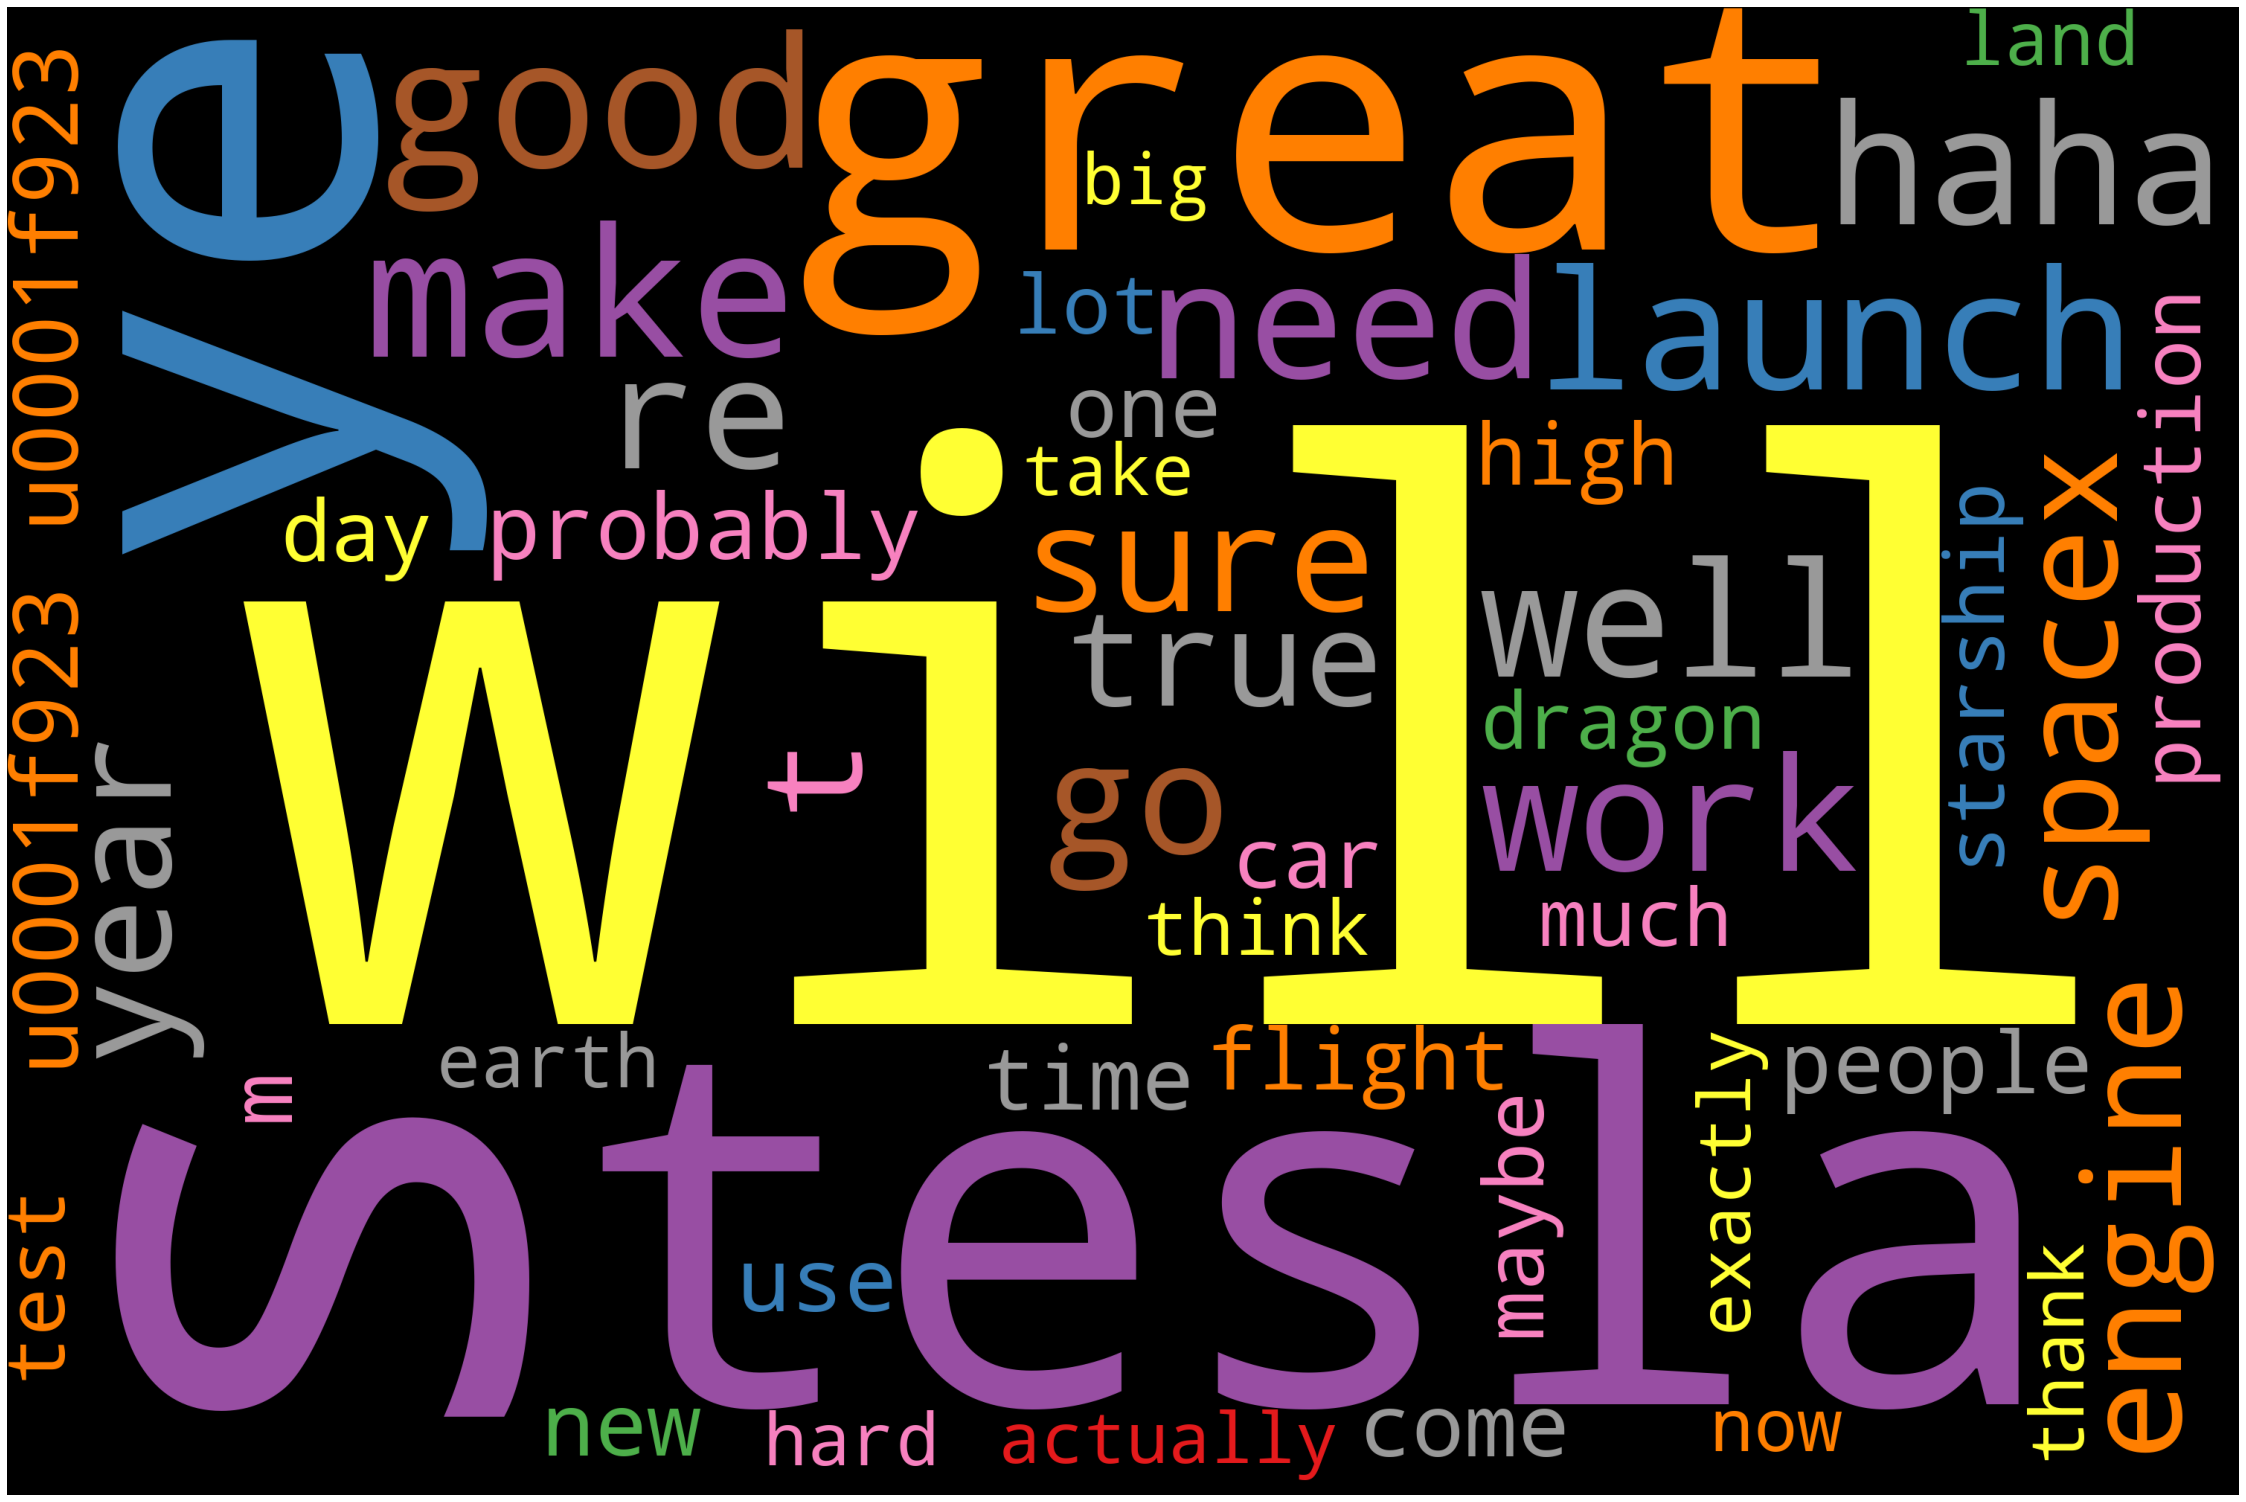

In [33]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                      colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

## 6. **Named Entity Recognition (NER)**
*Parts Of Speech (POS) Tagging*

In [34]:
nlp = spacy.load('en_core_web_sm')

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

#### *DATE*

In [35]:
for token in doc_block[100:200]:
    print(token,token.pos_)    

toddler NOUN
hodler NOUN
he PRON
definitely ADV
have VERB
issue NOUN
but CCONJ
the DET
sentencing NOUN
seem VERB
bit NOUN
high ADJ
thank NOUN
for ADP
fix NOUN
please INTJ
unlock VERB
my PRON
account NOUN
u0001f923 ADJ
u0001f923 ADJ
this PRON
be AUX
true ADJ
power NOUN
haha INTJ
any DET
crypto ADJ
wallet NOUN
that PRON
win VERB
 PROPN
t PROPN
give VERB
you PRON
your PRON
private ADJ
key NOUN
should AUX
be AUX
avoid VERB
at ADV
all ADV
cost VERB
your PRON
app NOUN
suck PROPN
rt PROPN
nasa PROPN
have VERB
select ADJ
falcon NOUN
heavy ADJ
to PART
launch VERB
the DET
first ADJ
two NUM
element NOUN
of ADP
the DET
lunar ADJ
gateway NOUN
together ADV
on ADP
one NUM
mission NOUN
yes INTJ
once SCONJ
we PRON
can AUX
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
will AUX
ipo NOUN
starlink NOUN
be AUX
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
if SCONJ
we PRON
don VERB
spacex ADV
need VERB
to PART
pass VERB
through ADP
deep ADJ
chas

*Filtering the nouns and verbs only*

In [36]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['table', 's', '\x92', 'miss', 'work', 'go', 'seem', 'bit', 'doge', 'appear', 'fix', 'coin', 'unit', 'time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'hodl', 'rainforest', 'come', 's', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'have', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 's', 'kingdom', 'hear', 'name', 'year', 's', 'thing', 'restaurant', 'get', 'hang', 'stranger', 'currency', 'earth', 'scratch', 'u0001f5a4', 'destiny', 'say', 'ship', 'landing', 'burn', 'have', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'turbopumpfe', 'raptor', 'have', 'mu', 'launch', 'mission', 'collect', 'datum', 'galaxy']


*Counting the noun & verb tokens*

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10] 

,word,count
0,be,124
1,have,95
2,tesla,87
3,make,64
4,launch,60
5,need,53
6,do,51
7,year,49
8,work,49
9,go,48


*Visualizing results (Barchart for top 10 nouns + verbs)*

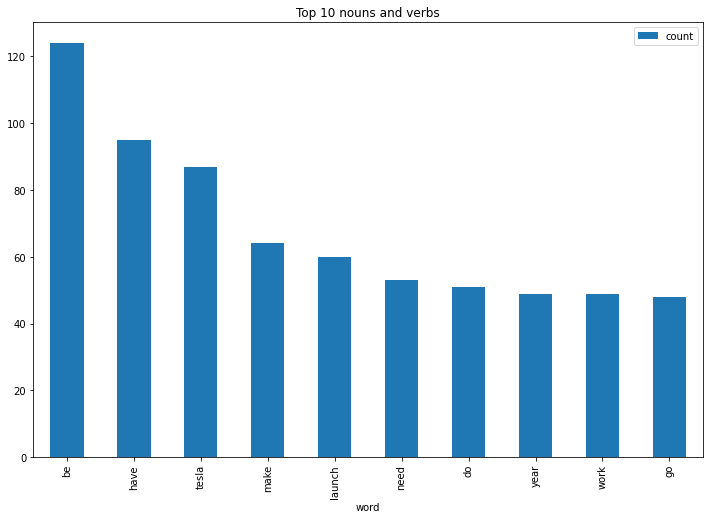

In [38]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 7. **Emotion Mining - Sentiment Analysis**

In [39]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(tweet_data))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [40]:
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


- Emotion Lexicon - We combined given Negative and positive words,and give them ranking and make a csv file

In [41]:
sentiment.head()

,word,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1


In [42]:
sentiment.tail()

,word,value
6784,zaps,-1
6785,zealot,-1
6786,zealous,-1
6787,zealously,-1
6788,zombie,-1


In [43]:
affinity_scores = sentiment.set_index('word')['value'].to_dict()
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

- Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence

In [44]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

*Manual testing*

In [45]:
calculate_sentiment(text='zest')

0

In [46]:
calculate_sentiment(text='desperation')

-1

*Calculating sentiment value for each sentence*

In [47]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      1
3      0
4      0
      ..
919    0
920   -1
921    0
922    0
923    0
Name: sentiment_value, Length: 924, dtype: int64

*To look how many words are there in a sentence*

In [48]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [49]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5,60
363,4D is essential for dynamically occluded objec...,-3,45
886,This is primarily an electrical/electronic (ch...,-3,69
525,Hollywood should just start with the sequel &a...,-3,66
156,We couldnt get everything done in https://t....,-3,65
...,...,...,...
299,It was designed from the beginning with human ...,5,64
371,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,5,65
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7,231


In [50]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       0.455628
std        1.220616
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sentiment_value, dtype: float64

In [51]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-1,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [52]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,1,4
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,1,10
10,https://t.co/3pWt @ajtourville Yes @BLKMDL3 @R...,1,28
14,"@tobyliiiiiiiiii This is intended for Earth, b...",1,38
17,Back to work I go @CapybaraSurfer @MattWallace...,1,38
...,...,...,...
909,Mass Effect 2 (talking about sequels) is amazing.,1,8
911,He was one of the very best.,1,7
913,"@Ali_Afshari In general, we need to improve ho...",1,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",2,15


*Adding index column*

In [53]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


*Plotting the sentiment value for whole review*

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

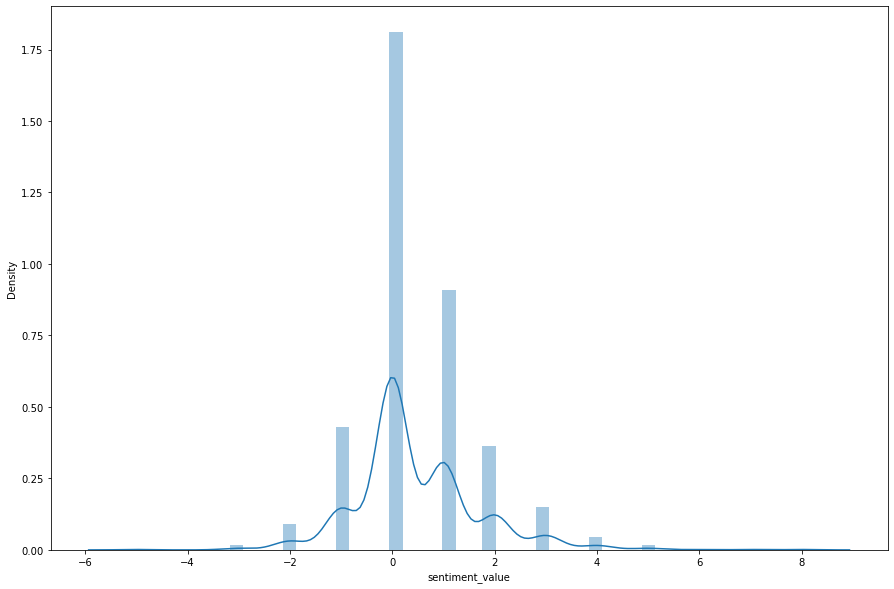

In [54]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

*Plotting the line plot for sentiment value of whole review*

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

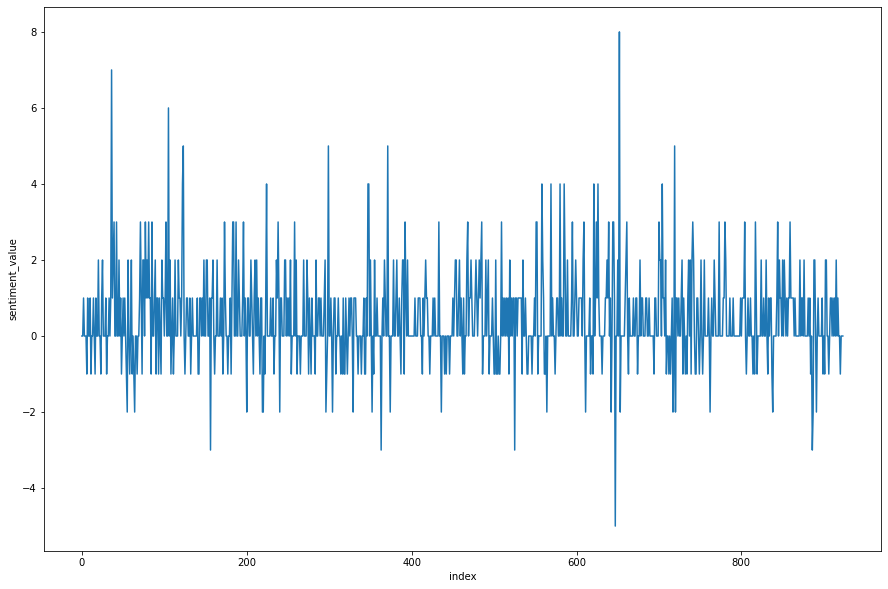

In [55]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

**Correlation analysis**

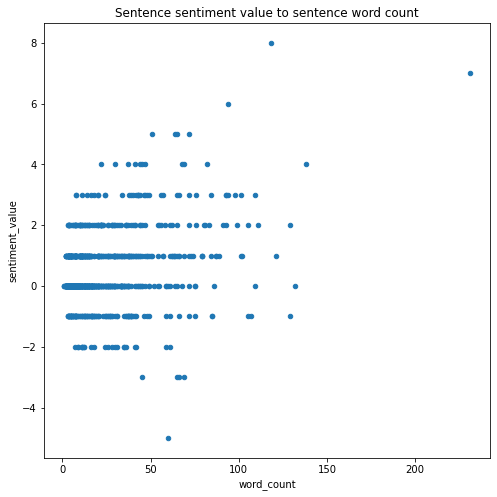

In [56]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**